
# **MODELLING - MODUL 8 (TUGAS VERSI A/1)**
**Nama** : Mochammad Delvin Farhan Akbar  
**Dataset** : Mall Customer Segmentation Data (Mall_Customers.csv)  
**Tools** : Python, Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn  
**Link Notebook** : https://colab.research.google.com/drive/1WStlHqkpf0aWPSL01YqbgXLN6TZYdeGR?usp=sharing  
**Link Dataset** : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv

Dataset yang digunakan berjudul Mall Customers Segmentation Data yang berisi informasi pelanggan dari sebuah pusat perbelanjaan.  
Tiap pelanggan memiliki atribut berikut:
- **CustomerID** : ID unik untuk tiap pelanggan.  
- **Gender** : Jenis kelamin pelanggan.  
- **Age** : Umur pelanggan.  
- **Annual Income (k$)** : Pendapatan tahunan dalam ribuan dolar.  
- **Spending Score (1–100)** : Skor pengeluaran berdasarkan kebiasaan belanja dan perilaku loyalitas.

Tujuan analisis ini adalah melakukan segmentasi pelanggan menggunakan metode Clustering (K-Means) agar manajemen mall dapat mengidentifikasi kelompok pelanggan dengan karakteristik berbeda.

## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2. Load Dataset & Data Overview

In [6]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## 3. Data Preparation


In [8]:
data = df.drop("CustomerID", axis=1)

data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


1. Dataset tidak memiliki missing value, seluruh 200 baris data lengkap.
2. Kolom `CustomerID` dihapus karena tidak relevan dalam analisis.
3. Kolom `Gender` dikonversi ke bentuk numerik:  
   - Male → 0  
   - Female → 1

4. Semua kolom numerik (`Gender`, `Age`, `Annual Income`, `Spending Score`) dinormalisasi menggunakan `StandardScaler` agar tiap fitur memiliki skala yang setara.

## 4. Exploratory Data Analysis (EDA)

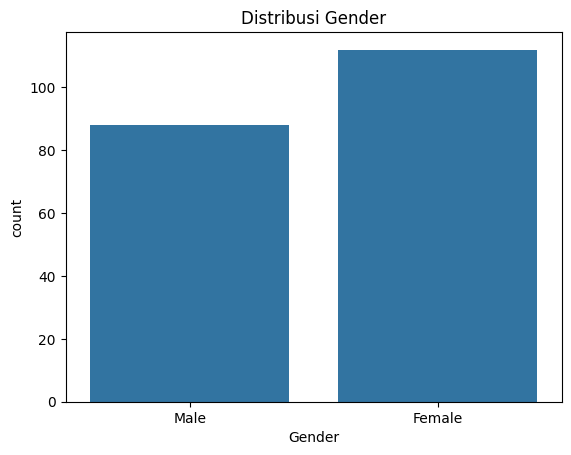

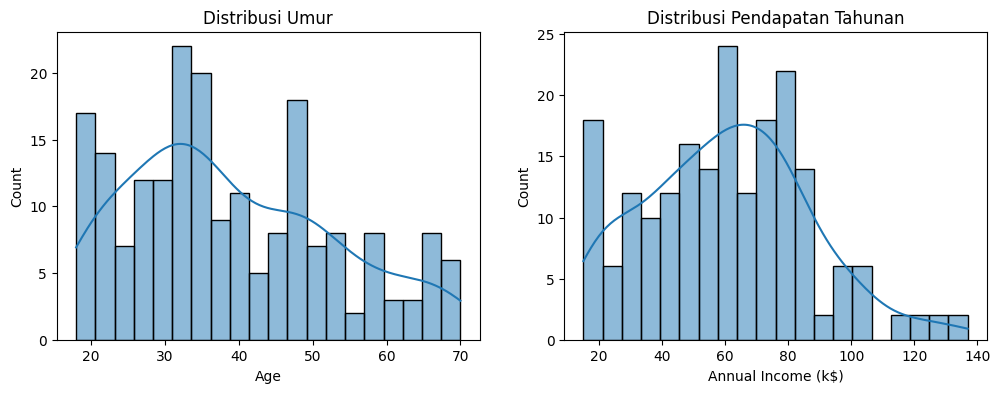

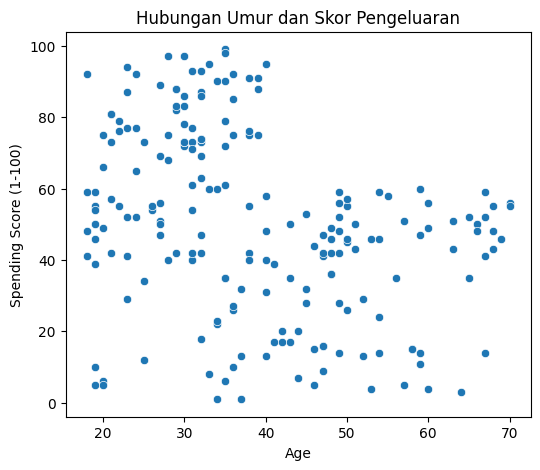

In [9]:
sns.countplot(x="Gender", data=df)
plt.title("Distribusi Gender")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribusi Umur")

sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribusi Pendapatan Tahunan")
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df)
plt.title("Hubungan Umur dan Skor Pengeluaran")
plt.show()

1. **Distribusi Gender:**  
   Jumlah pelanggan perempuan lebih banyak dibanding laki-laki.

2. **Distribusi Umur:**  
   Mayoritas pelanggan berusia antara 25–40 tahun.

3. **Distribusi Pendapatan:**  
   Pendapatan tahunan pelanggan berkisar antara 15k–140k dolar.

4. **Hubungan Umur dan Skor Pengeluaran:**  
   Pelanggan muda cenderung memiliki skor pengeluaran lebih tinggi dibanding pelanggan yang lebih tua.

Visualisasi yang digunakan:
- Histogram untuk umur & pendapatan.
- Scatterplot antara *Age* dan *Spending Score*.

## 5. Clustering dengan K-Means

Algoritma yang digunakan adalah K-Means Clustering, karena cocok untuk data numerik dan mudah diinterpretasikan.

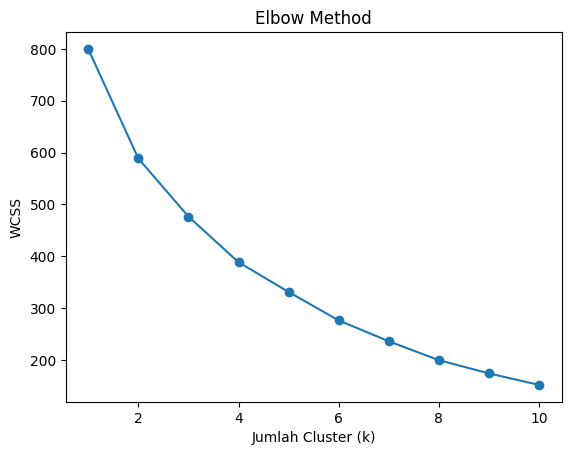

In [10]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.show()

Dari grafik WCSS, titik siku terlihat di k=5.

## 6. Model K-Means

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_df)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


## 7. Evaluasi Model (Silhouette Score)


Evaluasi dilakukan menggunakan Silhouette Score, yang mengukur seberapa baik setiap objek ditempatkan dalam cluster-nya.

In [12]:
silhouette_avg = silhouette_score(scaled_df, df["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.304


Nilai ini menunjukkan bahwa hasil clustering cukup baik, meskipun masih terdapat sedikit tumpang tindih antar-cluster.

## 8. Visualisasi Hasil Clustering

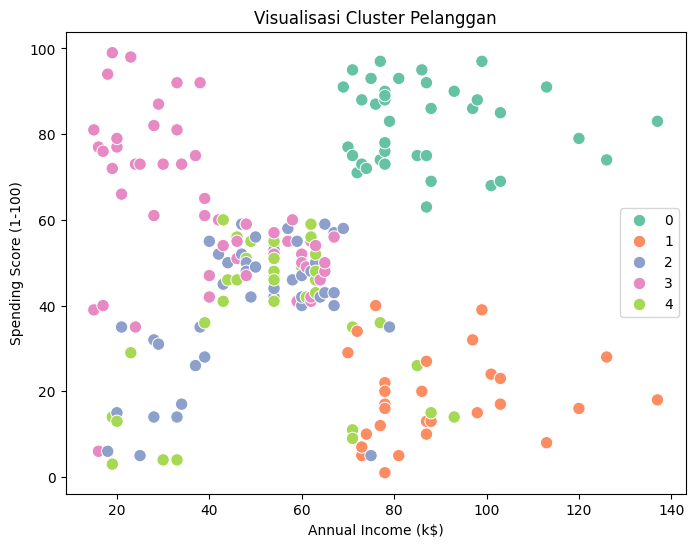

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    data=df,
    s=80
)
plt.title("Visualisasi Cluster Pelanggan")
plt.legend()
plt.show()

Visualisasi hasil clustering dilakukan menggunakan scatterplot dua dimensi dengan sumbu horizontal menampilkan Annual Income (k$) dan sumbu vertikal menampilkan Spending Score (1–100). Setiap titik merepresentasikan satu pelanggan, dan warna berbeda menunjukkan cluster hasil segmentasi K-Means.

Dari hasil visualisasi, dapat diamati pola yang cukup jelas antara pendapatan tahunan dan skor pengeluaran pelanggan:

- 🟢 **Cluster 0 (kanan atas)**: Pelanggan dengan pendapatan tinggi dan pengeluaran tinggi. Ini merupakan segmen pelanggan bernilai tinggi (*high-value customers*) karena memiliki daya beli kuat dan tingkat pengeluaran besar.  
- 🟣 **Cluster 1 (kanan bawah)**: Pelanggan dengan pendapatan tinggi namun pengeluaran rendah. Mereka cenderung hemat dan selektif dalam berbelanja.  
- 🔵 **Cluster 2 (tengah bawah)**: Pelanggan dengan pendapatan menengah dan pengeluaran moderat, cenderung stabil dalam aktivitas belanja.  
- 🟡 **Cluster 3 (kiri atas)**: Pelanggan berpendapatan rendah namun dengan skor pengeluaran tinggi. Ini menunjukkan perilaku impulsif, yaitu cenderung sering berbelanja meskipun penghasilannya kecil.  
- 🟠 **Cluster 4 (kiri bawah)**: Pelanggan dengan pendapatan dan pengeluaran rendah, kemungkinan merupakan kelompok pelanggan biasa yang kurang aktif dalam belanja.

Secara visual, grafik menunjukkan pemisahan cluster yang cukup baik, terutama antara pelanggan berpendapatan tinggi dengan yang berpendapatan rendah. Hal ini membuktikan bahwa variabel Annual Income dan Spending Score merupakan faktor utama dalam membentuk segmentasi pelanggan di dataset ini.

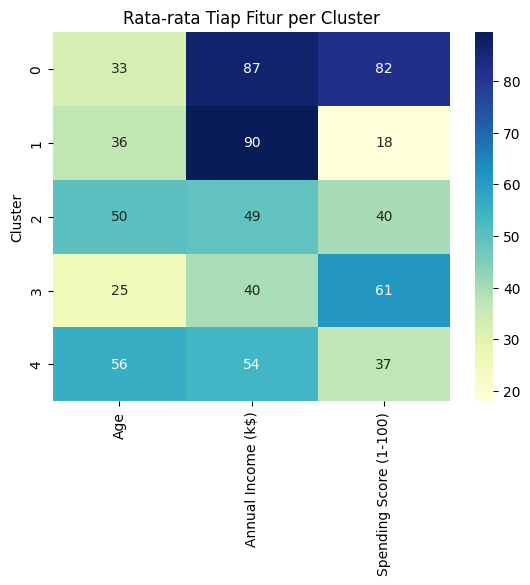

In [16]:
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu")
plt.title("Rata-rata Tiap Fitur per Cluster")
plt.show()

Heatmap memperlihatkan bahwa:
- Cluster 0 memiliki nilai rata-rata tertinggi pada Spending Score dan Income.
- Cluster 1 juga berpendapatan tinggi, tetapi Spending Score-nya rendah.
- Cluster 3 memiliki kombinasi Income rendah namun Spending Score tinggi.
- Cluster 4 cenderung rendah di semua aspek.

## 9. Interpretasi Cluster

In [14]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.692308,86.538462,82.128205
1,36.482759,89.517241,18.000000
2,49.813953,49.232558,40.069767
3,24.907407,39.722222,61.203704
4,55.714286,53.685714,36.771429



| Cluster | Rata-rata Umur | Pendapatan (k$) | Skor Pengeluaran | Interpretasi |
|----------|----------------|------------------|------------------|---------------|
| 0 | 32.7 | 86.5 | 82.1 | Pelanggan muda dengan pendapatan tinggi dan pengeluaran tinggi → *Target utama promosi premium*. |
| 1 | 36.5 | 89.5 | 18.0 | Pendapatan tinggi namun pengeluaran rendah → *Potensi pelanggan hemat*. |
| 2 | 49.8 | 49.2 | 40.1 | Pelanggan paruh baya dengan pengeluaran moderat. |
| 3 | 24.9 | 39.7 | 61.2 | Pelanggan muda berpendapatan rendah namun aktif berbelanja → *Impulsive buyer*. |
| 4 | 55.7 | 53.7 | 36.8 | Pelanggan senior dengan pengeluaran rendah → *Loyal tapi tidak konsumtif*. |

## 10. Kesimpulan Sementara

In [15]:
for i in range(len(cluster_summary)):
    print(f"Cluster {i}:")
    print(f"Rata-rata Umur: {cluster_summary['Age'][i]:.1f}")
    print(f"Pendapatan Tahunan: {cluster_summary['Annual Income (k$)'][i]:.1f}k$")
    print(f"Skor Pengeluaran: {cluster_summary['Spending Score (1-100)'][i]:.1f}")
    print("-"*40)

Cluster 0:
Rata-rata Umur: 32.7
Pendapatan Tahunan: 86.5k$
Skor Pengeluaran: 82.1
----------------------------------------
Cluster 1:
Rata-rata Umur: 36.5
Pendapatan Tahunan: 89.5k$
Skor Pengeluaran: 18.0
----------------------------------------
Cluster 2:
Rata-rata Umur: 49.8
Pendapatan Tahunan: 49.2k$
Skor Pengeluaran: 40.1
----------------------------------------
Cluster 3:
Rata-rata Umur: 24.9
Pendapatan Tahunan: 39.7k$
Skor Pengeluaran: 61.2
----------------------------------------
Cluster 4:
Rata-rata Umur: 55.7
Pendapatan Tahunan: 53.7k$
Skor Pengeluaran: 36.8
----------------------------------------


## **Kesimpulan**

Berdasarkan hasil analisis clustering menggunakan algoritma K-Means dengan 5 cluster, dapat disimpulkan bahwa pelanggan mall memiliki karakteristik yang bervariasi dalam hal umur, pendapatan, dan perilaku pengeluaran. Model berhasil mengelompokkan pelanggan menjadi lima segmen utama, di mana terdapat kelompok pelanggan dengan pendapatan dan pengeluaran tinggi yang menjadi target utama promosi, serta kelompok dengan pendapatan tinggi namun pengeluaran rendah yang berpotensi ditingkatkan loyalitasnya. Selain itu, ditemukan juga kelompok pelanggan muda dengan pengeluaran tinggi yang dapat menjadi sasaran program promosi impulsif seperti diskon atau loyalty card. Secara keseluruhan, hasil segmentasi ini memberikan dasar yang kuat bagi manajemen mall dalam merancang strategi pemasaran yang lebih efektif, personal, dan berbasis data.
